In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df = pd.read_csv("car data.csv")

In [155]:
df.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [156]:
df.drop(['Car_Name','company'],axis = 1,inplace= True)

In [157]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [158]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [159]:
## Finding the data type of all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [160]:
## checking for missing values
df.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

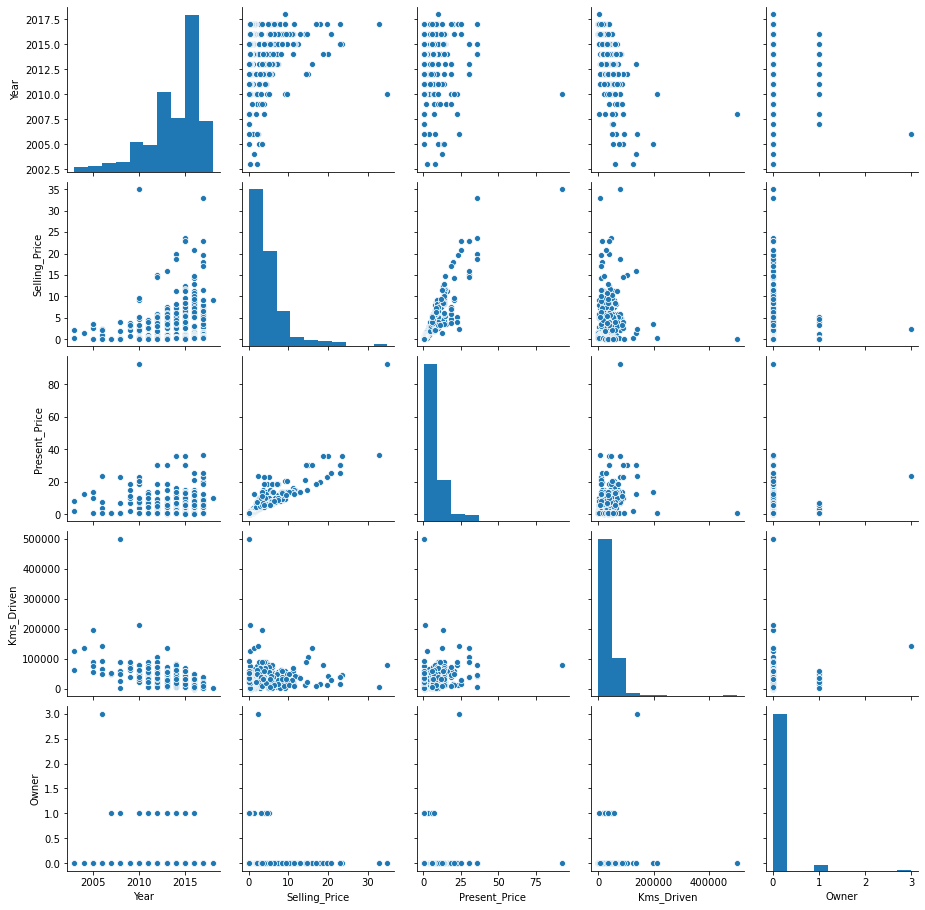

In [161]:
sns.pairplot(df)

**Checking for outliers using boxplot**

AxesSubplot(0.125,0.125;0.775x0.755)


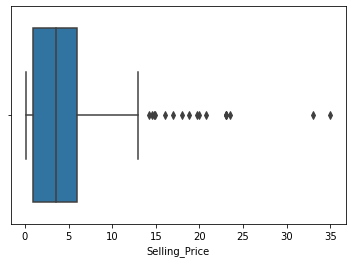

In [162]:
print(sns.boxplot(df['Selling_Price']))

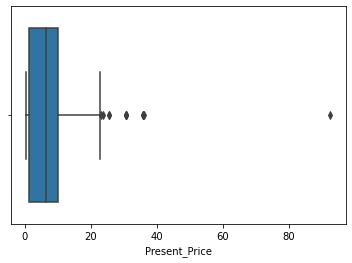

In [163]:
sns.boxplot(df['Present_Price'])

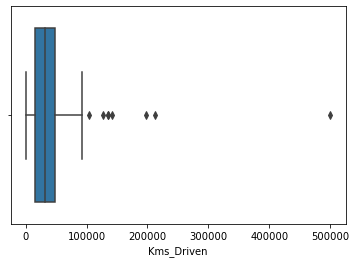

In [164]:
sns.boxplot(df['Kms_Driven'])

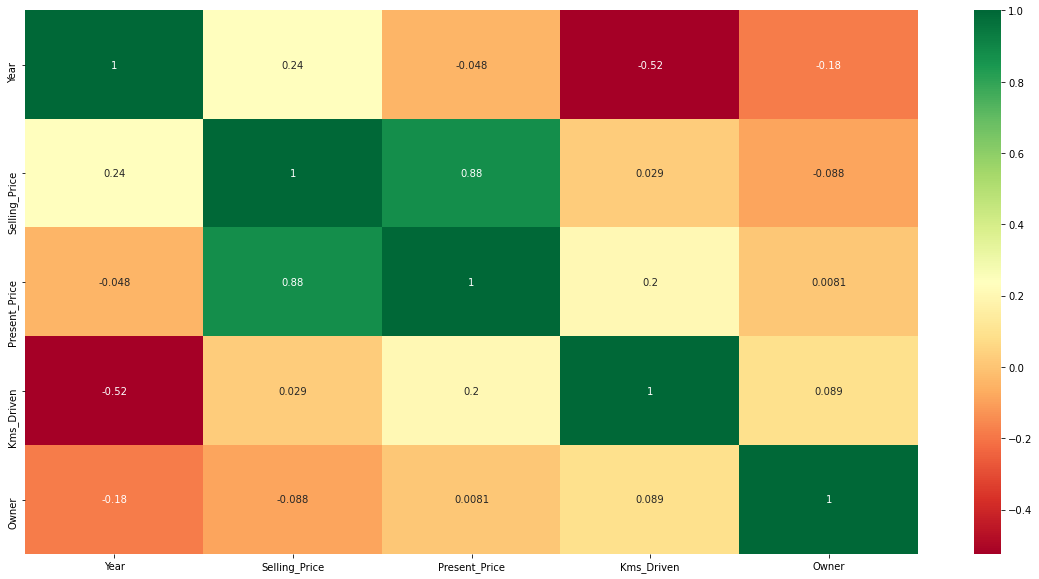

In [165]:
## finding correlation using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap="RdYlGn",annot = True)  ## annot display the corr value as well

## i think owner feature can be removed as it as very low correlation and doesnt much affect our target

In [166]:
## finding how old the car is
df['Years_old'] = 2020- df['Year'] 

In [167]:
## Encoding
df= pd.get_dummies(df,drop_first = True) 

In [168]:
df.drop(['Year'],inplace= True,axis=1)

In [169]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [170]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [171]:
## finding important features
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()

In [172]:
model.fit(X,Y)

ExtraTreesRegressor()

In [173]:
imp_features =model.feature_importances_
imp_features

array([3.98874451e-01, 4.00024789e-02, 3.93433138e-04, 7.85322914e-02,
       2.14804005e-01, 1.44270870e-02, 1.26127177e-01, 1.26839076e-01])

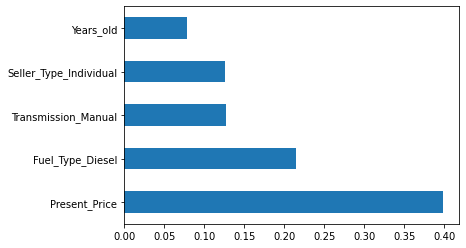

In [174]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [176]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [177]:
## hypermater thunning using RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [178]:
# Create the random grid
## It should be in the form of Key-Value pair. SO we use Dictionary
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [179]:
# First create the base model to tune
rf = RandomForestRegressor()

In [180]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [181]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   54.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [182]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [183]:
rf_random.best_score_


-2.0281627094391728

In [184]:
predictions=rf_random.predict(x_test)

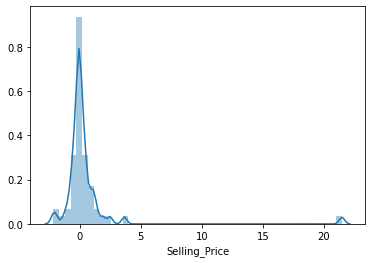

In [185]:
## Comparing the actual data and predicted- Normal/Gaussian Distribution shows its a good prediction with less error
sns.distplot(y_test-predictions)

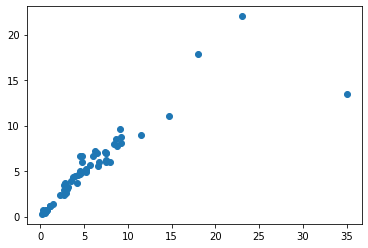

In [186]:
## scatter plot helps us with the comparison
plt.scatter(y_test,predictions)

In [187]:
from sklearn import metrics

In [188]:
## finding the accuracy of model using various metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.9063162295081977
MSE: 8.346273802863971
RMSE: 2.8889918315675405


In [189]:
import pickle

In [190]:
X.head()

,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [191]:
from sklearn.linear_model import Ridge

In [192]:
ridgereg = Ridge()

In [193]:
n_param = {'alpha':[1,2,3,4,5,6,7,8,9,10]}

In [194]:
rid_reg = RandomizedSearchCV(estimator = ridgereg, param_distributions= n_param ,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [195]:
ridgereg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [196]:
rid_reg.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=2 .........................................................
[CV] .......................................... alpha=2, total=   0.0s
[CV] alpha=2 .........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=3 .........................................................
[CV] .......................................... alpha=3, total=   0.0s
[CV] alpha=4 .........................................................
[CV] .......................................... alpha=4, total=   0.0s
[CV] alpha=4 .........................................................
[CV] .......................................... alpha=4, total=   0.0s
[CV] alpha=4 .........................................................
[CV] .......................................... alpha=4, total=   0.0s
[CV] alpha=4 .........................................................
[CV] .......................................... alpha=4, total=   0.0s
[CV] alpha=4 .........................................................
[CV] .......................................... alpha=4, total=   0.0s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=Ridge(), n_jobs=1,
                   param_distributions={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                  10]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [197]:
rid_reg.best_params_

{'alpha': 10}

In [237]:
predictions_rid=rid_reg.predict(x_test)
predictions_rid

array([-0.8197888 ,  8.34367967,  4.63639323,  1.65952747,  1.12395537,
        8.72271928,  6.39806146,  3.8832348 ,  0.11607013,  4.82106906,
        5.9452581 ,  3.36794889,  1.65344278,  6.57615048,  9.32152844,
        1.74891237,  4.9394919 ,  1.91762635,  5.09205277, 10.05365349,
        1.71838512,  6.46153394,  1.04861405,  7.0534637 ,  1.81798957,
        6.70946599, -0.39757342,  5.43799206,  6.49262621,  6.54219679,
       10.76338237,  8.29351748,  6.31733365,  0.52823377,  4.24949124,
        1.56110757,  3.91148246,  7.56099866, 18.97161377,  6.34015934,
        7.33538809,  3.22705958,  2.04187361,  7.85696037, 11.12948234,
        2.52327408,  2.55305229,  3.98173849,  3.40766024,  5.66989535,
       14.1017326 ,  0.07116982,  7.18824687, 49.71334703,  1.80803456,
        5.63117406,  0.28948927,  4.11144511, -0.89152875,  2.07840806,
        6.95134241])

In [199]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_rid))
print('MSE:', metrics.mean_squared_error(y_test, predictions_rid))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_rid)))

MAE: 1.3492789493571815
MSE: 5.63112526378132
RMSE: 2.3729992127645807


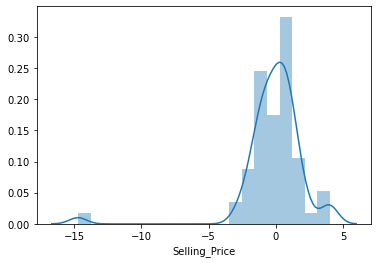

In [200]:
sns.distplot(y_test-predictions_rid)

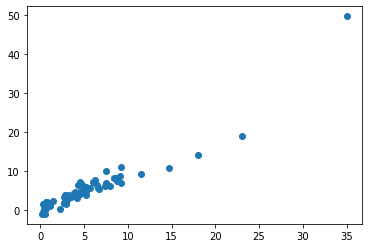

In [201]:
plt.scatter(y_test,predictions_rid)
plt.show()

In [202]:
from sklearn.linear_model import Lasso

In [203]:
lassoreg = Lasso()

In [204]:
n_param = {'alpha':[1,2,3,4,5,6,7,8,9,10]}

In [205]:
las_reg = RandomizedSearchCV(estimator = lassoreg, param_distributions= n_param ,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [206]:
las_reg.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=2 .........................................................
[CV] .......................................... alpha=2, total=   0.0s
[CV] alpha=2 .........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......................................... alpha=4, total=   0.0s
[CV] alpha=4 .........................................................
[CV] .......................................... alpha=4, total=   0.0s
[CV] alpha=4 .........................................................
[CV] .......................................... alpha=4, total=   0.0s
[CV] alpha=4 .........................................................
[CV] .......................................... alpha=4, total=   0.0s
[CV] alpha=4 .........................................................
[CV] .......................................... alpha=4, total=   0.0s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.0s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.0s
[CV] alpha=5 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=Lasso(), n_jobs=1,
                   param_distributions={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                  10]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [207]:
las_reg.best_params_

{'alpha': 1}

In [208]:
predictions_las=las_reg.predict(x_test)

In [209]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_las))
print('MSE:', metrics.mean_squared_error(y_test, predictions_las))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_las)))

MAE: 1.3465474716667754
MSE: 7.192393143141597
RMSE: 2.6818637443281115


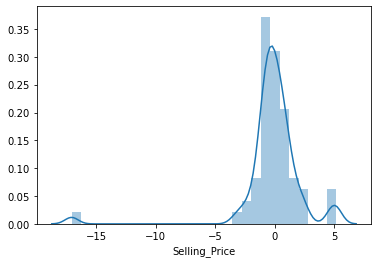

In [210]:
sns.distplot(y_test-predictions_las)

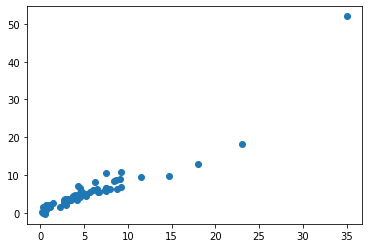

In [211]:
plt.scatter(y_test,predictions_las)
plt.show()

In [212]:
from sklearn.linear_model import LinearRegression

In [213]:
linear_reg = LinearRegression()

In [214]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [215]:
print("Intercept:",linear_reg.intercept_)
print("Coefficient:",linear_reg.coef_)

Intercept: 3.210776651553238
Coefficient: [ 5.23052427e-01 -5.99549778e-06 -1.02800233e+00 -3.90352585e-01
  2.05535590e+00  4.77488082e-01 -4.01240135e-01 -4.77388337e-01]


In [216]:
predictions_lin=linear_reg.predict(x_test)

In [217]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lin))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lin)))

MAE: 1.3450108928920528
MSE: 5.227398341354948
RMSE: 2.2863504415016846


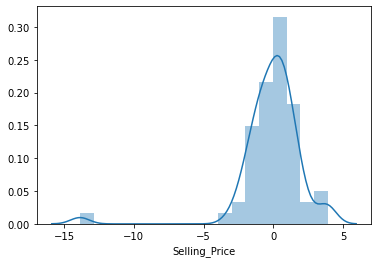

In [218]:
sns.distplot(y_test-predictions_lin)

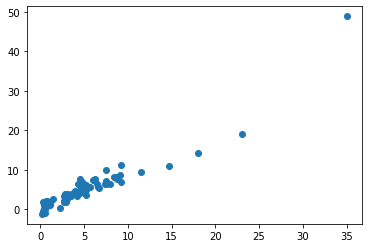

In [219]:
plt.scatter(y_test,predictions_lin)
plt.show()

In [220]:
from sklearn.ensemble import AdaBoostRegressor 

In [221]:
adaboos = AdaBoostRegressor()

In [222]:
learning_rate = [float(x) for x in np.linspace(start = 0, stop = 2, num = 200)]
loss = ['linear','square','exponential']
n_estimators = [int(x) for x in range(50,1000,50)]

In [223]:
random_grid={'n_estimators':n_estimators,
            'learning_rate':learning_rate,
             'loss':loss}

In [224]:
ab_reg = RandomizedSearchCV(estimator = adaboos, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [225]:
ab_reg.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=650, loss=square, learning_rate=1.2763819095477387 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=650, loss=square, learning_rate=1.2763819095477387, total=   1.3s
[CV] n_estimators=650, loss=square, learning_rate=1.2763819095477387 .


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=650, loss=square, learning_rate=1.2763819095477387, total=   1.3s
[CV] n_estimators=650, loss=square, learning_rate=1.2763819095477387 .
[CV]  n_estimators=650, loss=square, learning_rate=1.2763819095477387, total=   1.3s
[CV] n_estimators=650, loss=square, learning_rate=1.2763819095477387 .
[CV]  n_estimators=650, loss=square, learning_rate=1.2763819095477387, total=   1.2s
[CV] n_estimators=650, loss=square, learning_rate=1.2763819095477387 .
[CV]  n_estimators=650, loss=square, learning_rate=1.2763819095477387, total=   1.3s
[CV] n_estimators=300, loss=linear, learning_rate=0.15075376884422112 
[CV]  n_estimators=300, loss=linear, learning_rate=0.15075376884422112, total=   0.5s
[CV] n_estimators=300, loss=linear, learning_rate=0.15075376884422112 
[CV]  n_estimators=300, loss=linear, learning_rate=0.15075376884422112, total=   0.7s
[CV] n_estimators=300, loss=linear, learning_rate=0.15075376884422112 
[CV]  n_estimators=300, loss=linear, learning_rate=0.150753768

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   45.8s finished


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=1,
                   param_distributions={'learning_rate': [0.0,
                                                          0.010050251256281407,
                                                          0.020100502512562814,
                                                          0.03015075376884422,
                                                          0.04020100502512563,
                                                          0.05025125628140704,
                                                          0.06030150753768844,
                                                          0.07035175879396985,
                                                          0.08040201005025126,
                                                          0.09045226130653267,
                                                          0.10050251256281408,
                                                          0.11055276381909548,


In [226]:
ab_reg.best_params_

{'n_estimators': 950, 'loss': 'square', 'learning_rate': 0.7738693467336684}

In [227]:
predictions_ab = ab_reg.predict(x_test)

In [228]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_ab))
print('MSE:', metrics.mean_squared_error(y_test, predictions_ab))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_ab)))

MAE: 1.169056455966947
MSE: 7.564536805094802
RMSE: 2.7503703032673257


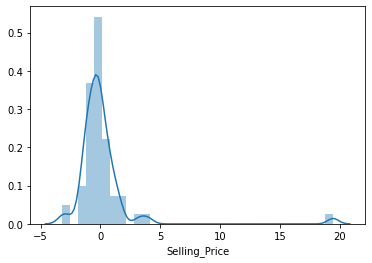

In [229]:
sns.distplot(y_test-predictions_ab)

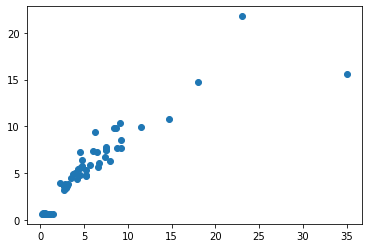

In [230]:
plt.scatter(y_test,predictions_ab)
plt.show()

In [231]:
file = open("model_car.pkl","wb")
pickle.dump(rid_reg,file)

In [233]:
model = pickle.load(open("model_car.pkl","rb"))

In [240]:
model.predict([[5.0,5000,1,5,0,1,1,0]])

array([4.85989421])